In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [14]:
# Import necessary libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

%matplotlib inline

In [15]:
from google.cloud import bigquery

# Create client object
client = bigquery.Client()

# Create dataset reference
dataset_ref = client.dataset('google_analytics_sample', project='bigquery-public-data')

# Retrieve dataset from reference
dataset = client.get_dataset(dataset_ref)

Using Kaggle's public dataset BigQuery integration.


In [16]:
# Create table reference
table_ref_20160801 = dataset_ref.table('ga_sessions_20160801')

# Retrieve table from reference
table_20160801 = client.get_table(table_ref_20160801)

# View columns
client.list_rows(table_20160801, max_results=5).to_dataframe()

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,channelGrouping,socialEngagementType
0,NaN,1,1470046245,1470046245,20160801,"{'visits': 1, 'hits': 24, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Firefox', 'browserVersion': 'not ...","{'continent': 'Europe', 'subContinent': 'Weste...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",895954260133011192,None,Organic Search,Not Socially Engaged
1,NaN,1,1470084717,1470084717,20160801,"{'visits': 1, 'hits': 24, 'pageviews': 18, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Internet Explorer', 'browserVersi...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 13, 'minu...",0288478011259077136,None,Direct,Not Socially Engaged
2,NaN,3,1470078988,1470078988,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",6440789996634275026,None,Organic Search,Not Socially Engaged
3,NaN,4,1470075581,1470075581,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 19, 'ti...","{'referralPath': '/', 'campaign': '(not set)',...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 11, 'minu...",8520115029387302083,None,Referral,Not Socially Engaged
4,NaN,30,1470099026,1470099026,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 17, 'minu...",6792260745822342947,None,Organic Search,Not Socially Engaged


In [17]:
def format_schema_field(schema_field, indent=0):
    indent_str = "  " * indent
    field_info = f"{indent_str}{schema_field.name} ({schema_field.field_type})"
    
    if schema_field.mode != "NULLABLE":
        field_info += f" - {schema_field.mode}"
    
    if schema_field.description:
        field_info += f" - {schema_field.description}"
    
    nested_indent = indent + 2
    if schema_field.field_type == "RECORD":
        for sub_field in schema_field.fields:
            field_info += "\n" + format_schema_field(sub_field, nested_indent)
    
    return field_info

# Display schemas
print("SCHEMA field for the 'totals' column:\n")
print(format_schema_field(table_20160801.schema[5]))
print()

print("\nSCHEMA field for the 'trafficSource' column:\n")
print(format_schema_field(table_20160801.schema[6]))
print()

print("\nSCHEMA field for the 'device' column:\n")
print(format_schema_field(table_20160801.schema[7]))
print()

print("\nSCHEMA field for the 'geoNetwork' column:\n")
print(format_schema_field(table_20160801.schema[8]))
print()

print("\nSCHEMA field for the 'customDimensions' column:\n")
print(format_schema_field(table_20160801.schema[9]))
print()

print("\nSCHEMA field for the 'hits' column:\n")
print(format_schema_field(table_20160801.schema[10]))

SCHEMA field for the 'totals' column:

totals (RECORD)
    visits (INTEGER)
    hits (INTEGER)
    pageviews (INTEGER)
    timeOnSite (INTEGER)
    bounces (INTEGER)
    transactions (INTEGER)
    transactionRevenue (INTEGER)
    newVisits (INTEGER)
    screenviews (INTEGER)
    uniqueScreenviews (INTEGER)
    timeOnScreen (INTEGER)
    totalTransactionRevenue (INTEGER)
    sessionQualityDim (INTEGER)


SCHEMA field for the 'trafficSource' column:

trafficSource (RECORD)
    referralPath (STRING)
    campaign (STRING)
    source (STRING)
    medium (STRING)
    keyword (STRING)
    adContent (STRING)
    adwordsClickInfo (RECORD)
        campaignId (INTEGER)
        adGroupId (INTEGER)
        creativeId (INTEGER)
        criteriaId (INTEGER)
        page (INTEGER)
        slot (STRING)
        criteriaParameters (STRING)
        gclId (STRING)
        customerId (INTEGER)
        adNetworkType (STRING)
        targetingCriteria (RECORD)
            boomUserlistId (INTEGER)
        isV

In [18]:
query = """
    SELECT 
    CAST(fullVisitorId AS STRING) AS fullVisitorId,              -- Unique visitor ID
    visitNumber,                                                 -- The session number for this user
    visitId,
    hits.page.pagePath AS landing_page,                          -- Path of the page visited
    TIMESTAMP_SECONDS(visitStartTime) AS session_start_time,     -- Start time of the session in timestamp format
    PARSE_DATE('%Y%m%d', date) AS session_date,                  -- Date of the session in YYYYMMDD format
    trafficSource.source AS traffic_source,                      -- Source of the traffic (e.g., google, direct, referral)
    trafficSource.medium AS traffic_medium,                      -- Medium of the traffic (e.g., organic, CPC, referral)
    trafficSource.campaign AS traffic_campaign,                  -- Campaign name if the user arrived via a campaign
    trafficSource.keyword AS traffic_keyword,                    -- Keywords used by users in search engines
    trafficSource.adContent AS traffic_adContent,                -- The content of the ad that brought the user
    trafficSource.adwordsClickInfo.slot AS ad_slot,              -- Slot of the ad (e.g., top, side)
    trafficSource.adwordsClickInfo.adNetworkType AS network_type, -- Network type (e.g., Google Search, Google Display Network)
    trafficSource.referralPath AS referral_path,                 -- The path of the referring URL
    device.deviceCategory AS device_category,                    -- The category of the device (e.g., desktop, mobile)
    device.browser AS device_browser,                             -- The browser of the device (e.g., chrome, firefox)
    geoNetwork.country AS user_country,                          -- Country from which the user accessed the site
    hits.dataSource AS hits_datasource,                           -- Data source for the hit (e.g., web, app)
    hits.page.pageTitle AS hits_pagetitle,                       -- Title of the page hit
    totals.bounces AS total_bounces,                             -- Total bounces (1 for a bounced session, otherwise null)
    totals.hits AS total_hits,                                  -- Total number of hits within the session
    totals.newVisits AS total_new_visits,                        -- Total number of new users in session (1 for first visit, otherwise null)
    totals.pageviews AS total_pageviews,                         -- Total number of pageviews within the session
    totals.screenviews AS total_screenviews,                     -- Total number of screenviews within the session
    totals.timeOnScreen AS total_time_on_screen,                 -- The total time on screen in seconds
    totals.timeOnSite AS total_time_on_site,                     -- Total time of the session expressed in seconds
    totals.totalTransactionRevenue AS total_transaction_revenue, -- Total transaction revenue in micro-units
    totals.transactions AS total_transactions,                   -- Total number of ecommerce transactions within the session
    totals.UniqueScreenViews AS total_unique_screenviews,        -- Total number of unique screenviews within the session
    totals.visits AS total_visits                                -- The number of sessions (1 for sessions with interaction events, otherwise null)
FROM 
    `bigquery-public-data.google_analytics_sample.ga_sessions_*`, UNNEST(hits) AS hits
WHERE 
    _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
    AND hits.type = 'PAGE'
    AND hits.hitNumber = 1
"""


df_raw = client.query(query).result().to_dataframe()
df_raw.head(10)

,fullVisitorId,visitNumber,visitId,landing_page,session_start_time,session_date,traffic_source,traffic_medium,traffic_campaign,traffic_keyword,...,total_hits,total_new_visits,total_pageviews,total_screenviews,total_time_on_screen,total_time_on_site,total_transaction_revenue,total_transactions,total_unique_screenviews,total_visits
0,6864706473801806364,1,1494017025,/home,2017-05-05 20:43:45+00:00,2017-05-05,google,organic,(not set),(not provided),...,2,1.0,2,NaN,NaN,315.0,NaN,NaN,NaN,1
1,3894101476913686420,1,1493998207,/home,2017-05-05 15:30:07+00:00,2017-05-05,analytics.google.com,referral,(not set),None,...,2,1.0,2,NaN,NaN,154.0,NaN,NaN,NaN,1
2,4014933061868628465,1,1494031030,/home,2017-05-06 00:37:10+00:00,2017-05-05,(direct),(none),(not set),None,...,2,1.0,2,NaN,NaN,17.0,NaN,NaN,NaN,1
3,883499671894382803,1,1493981313,/signin.html,2017-05-05 10:48:33+00:00,2017-05-05,google,organic,(not set),None,...,2,1.0,2,NaN,NaN,15.0,NaN,NaN,NaN,1
4,6390038757285064273,2,1493969894,/home,2017-05-05 07:38:14+00:00,2017-05-05,google,cpc,(not set),(Remarketing/Content targeting),...,2,NaN,2,NaN,NaN,100.0,NaN,NaN,NaN,1
5,0524804297010456384,1,1494002137,/home,2017-05-05 16:35:37+00:00,2017-05-05,google,organic,(not set),(not provided),...,2,1.0,2,NaN,NaN,14.0,NaN,NaN,NaN,1
6,4345872713896022320,1,1493999796,/home,2017-05-05 15:56:36+00:00,2017-05-05,google,organic,(not set),(not provided),...,2,1.0,2,NaN,NaN,28.0,NaN,NaN,NaN,1
7,1133186462546400885,1,1494050805,/home,2017-05-06 06:06:45+00:00,2017-05-05,google,organic,(not set),(not provided),...,2,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,1
8,1995259757732655636,1,1494015868,/home,2017-05-05 20:24:28+00:00,2017-05-05,google,organic,(not set),(not provided),...,2,1.0,2,NaN,NaN,22.0,NaN,NaN,NaN,1
9,9512057838739387551,1,1494027756,/home,2017-05-05 23:42:36+00:00,2017-05-05,qiita.com,referral,(not set),None,...,2,1.0,2,NaN,NaN,63.0,NaN,NaN,NaN,1


In [19]:
df = df_raw.copy()
df.shape

(896425, 30)

In [20]:
# Create a unique identifier by combining fullVisitorId and visitId
df['unique_id'] = df['fullVisitorId'].astype(str) + "_" + df['visitId'].astype(str)


In [21]:
# List of categorical columns to check
categorical_columns = [
    'traffic_source', 'traffic_medium', 'traffic_campaign', 'device_category', 'user_country']

# Identify distinct values for each categorical column
for col in categorical_columns:
    distinct_values = df[col].unique()
    print(f"Distinct values in {col}: {distinct_values}")


Distinct values in traffic_source: ['google' 'analytics.google.com' '(direct)' 'qiita.com' 'Partners' 't.co'
 'facebook.com' 'm.facebook.com' 'youtube.com' 'dfa'
 'siliconvalley.about.com' 'optimize.google.com' 'google.com'
 'blog.golang.org' '(not set)' 'sites.google.com' 'groups.google.com'
 'l.facebook.com' 'bing' 'sashihara.jp' 'reddit.com'
 'googleads.g.doubleclick.net' 'dealspotr.com' 'phandroid.com'
 'docs.google.com' 'yahoo' 'baidu' 'quora.com' 'm.baidu.com'
 'fr.search.yahoo.com' 'lm.facebook.com' 'twitter.com' 'duckduckgo.com'
 'cv.il3.ub.edu' 'gophergala.com' 'online-metrics.com' 'plus.google.com'
 'mail.google.com' 'google.com.pk' 'keep.google.com' 's0.2mdn.net'
 'connect.googleforwork.com' 'aol' 'nordic.businessinsider.com'
 'images.google' 'google.pl' 'google.co.in' 'hangouts.google.com'
 'arstechnica.com' 'google.co.jp' 'google.gatewaycdi.com'
 'online.fullsail.edu' 'es.search.yahoo.com' 'github.com'
 'int.search.mywebsearch.com' 'ask' 'lunametrics.com' 'google.co.uk'
 '

In [22]:
# List of numerical columns
numerical_columns = [
    'total_bounces', 'total_hits', 'total_new_visits', 'total_pageviews',
    'total_screenviews', 'total_time_on_screen', 'total_time_on_site',
    'total_transaction_revenue', 'total_transactions', 'total_unique_screenviews'
]

# Calculate mean, median, min, max for numerical columns
for col in numerical_columns:
    mean_val = df[col].mean()
    median_val = df[col].median()
    min_val = df[col].min()
    max_val = df[col].max()
    print(f"{col} - Mean: {mean_val}, Median: {median_val}, Min: {min_val}, Max: {max_val}")


total_bounces - Mean: 1.0, Median: 1.0, Min: 1.0, Max: 1.0
total_hits - Mean: 4.5503907186881225, Median: 2.0, Min: 1, Max: 500
total_new_visits - Mean: 1.0, Median: 1.0, Min: 1.0, Max: 1.0
total_pageviews - Mean: 3.820251554787071, Median: 1.0, Min: 1, Max: 469
total_screenviews - Mean: nan, Median: nan, Min: nan, Max: nan
total_time_on_screen - Mean: nan, Median: nan, Min: nan, Max: nan
total_time_on_site - Mean: 261.30474381770034, Median: 83.0, Min: 1.0, Max: 19017.0
total_transaction_revenue - Mean: 153725422.84533116, Median: 55370000.0, Min: 1200000.0, Max: 47082060000.0
total_transactions - Mean: 1.0482931636950095, Median: 1.0, Min: 1.0, Max: 25.0
total_unique_screenviews - Mean: nan, Median: nan, Min: nan, Max: nan


/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice



In [23]:
df.drop(['total_screenviews','total_unique_screenviews'],axis=1,inplace=True) 

In [24]:
# Count distinct values and calculate percentages for each categorical column
for col in categorical_columns:
    count = df[col].value_counts()
    percent = df[col].value_counts(normalize=True) * 100
    result = pd.DataFrame({'Count': count, 'Percentage': percent})
    print(f"\n{col} Distribution:\n{result}\n")



traffic_source Distribution:
                             Count  Percentage
traffic_source                                
(direct)                    366244   40.856067
google                      240030   26.776362
youtube.com                 212383   23.692222
Partners                     16314    1.819896
analytics.google.com         16064    1.792007
...                            ...         ...
mx.search.yahoo.com              1    0.000112
search.snapdo.com                1    0.000112
espanol.search.yahoo.com         1    0.000112
int.search.mywebsearch.com       1    0.000112
chatwork.com                     1    0.000112

[275 rows x 2 columns]


traffic_medium Distribution:
                 Count  Percentage
traffic_medium                    
(none)          366242   40.855844
referral        261462   29.167192
organic         233340   26.030064
affiliate        16306    1.819003
cpc              12847    1.433137
cpm               6113    0.681931
(not set)          115  

In [25]:
def remove_columns_with_nulls(df, threshold, do_not_drop_columns):
    # Calculate the percentage of null values for each column
    null_percentage = df.isnull().mean() * 100
    
    # Identify columns to drop (where null percentage is greater than the threshold)
    columns_to_drop = null_percentage[null_percentage > threshold].index
    
    # Exclude the columns in the do_not_drop_columns list
    columns_to_drop = [col for col in columns_to_drop if col not in do_not_drop_columns]
    
    # Drop the columns
    df_cleaned = df.drop(columns=columns_to_drop)
    
    print(f"columns dropped : {columns_to_drop}")
    
    return df_cleaned


df_cleaned = remove_columns_with_nulls(df, 80, ['total_transaction_revenue', 'total_transactions'])

In [26]:
def combine_categories(df, columns, threshold):
    for col in columns:
        # Calculate the percentage of each category
        category_counts = df[col].value_counts(normalize=True)
        
        # Identify categories below the threshold
        low_frequency_categories = category_counts[category_counts < threshold].index
        
        # Replace these categories with a new label
        df[col] = df[col].apply(lambda x: f"{col}_others" if x in low_frequency_categories else x)
    
    return df

columns_to_combine = ['traffic_source', 'traffic_medium', 'traffic_campaign', 'device_category', 'user_country']
df_final = combine_categories(df_cleaned, columns_to_combine, 0.1)

In [35]:
df_final[['total_bounces','total_transaction_revenue', 'total_transactions']] = df_final[['total_bounces','total_transaction_revenue', 'total_transactions']].fillna(0)

0

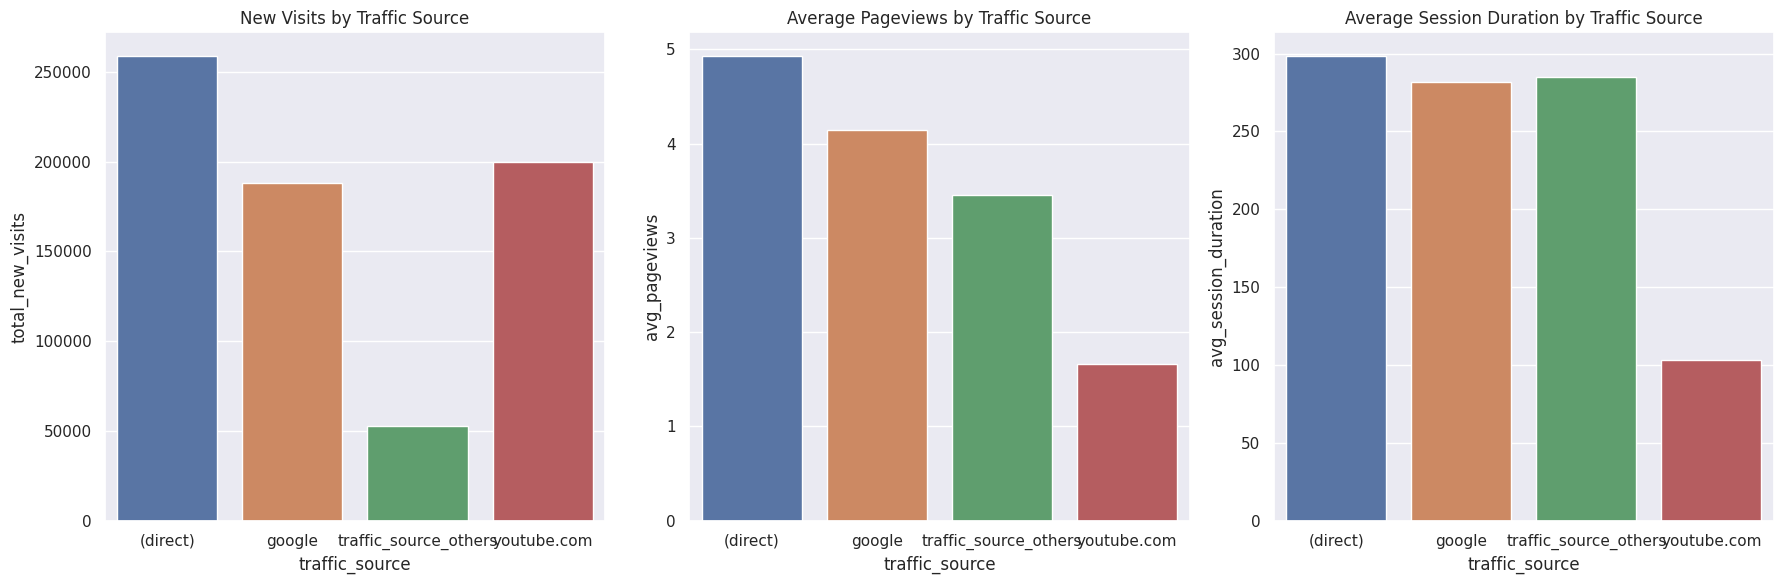

In [28]:
#Traffic Sources or Campaigns Driving the Highest Number of New Visits and Most Engaged Sessions

import seaborn as sns
import matplotlib.pyplot as plt

def plot_traffic_sources(df):
    traffic_source_df = df.groupby('traffic_source').agg(
        total_new_visits=('total_new_visits', 'sum'),
        avg_pageviews=('total_pageviews', 'mean'),
        avg_session_duration=('total_time_on_site', 'mean')
    ).reset_index()
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    sns.barplot(data=traffic_source_df, x='traffic_source', y='total_new_visits', ax=axes[0])
    axes[0].set_title('New Visits by Traffic Source')
    
    sns.barplot(data=traffic_source_df, x='traffic_source', y='avg_pageviews', ax=axes[1])
    axes[1].set_title('Average Pageviews by Traffic Source')
    
    sns.barplot(data=traffic_source_df, x='traffic_source', y='avg_session_duration', ax=axes[2])
    axes[2].set_title('Average Session Duration by Traffic Source')
    
    plt.tight_layout()
    plt.show()

plot_traffic_sources(df_final)


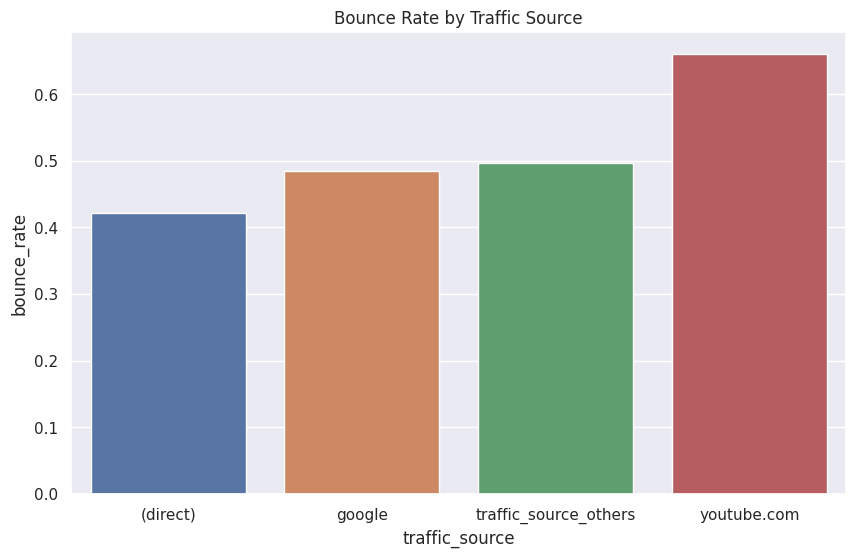

In [36]:
#Acquisition Channels with the Highest Bounce Rates

def plot_bounce_rates(df):
    bounce_rate_df = df.groupby('traffic_source').agg(
        bounce_rate=('total_bounces', 'mean')
    ).reset_index()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=bounce_rate_df, x='traffic_source', y='bounce_rate')
    plt.title('Bounce Rate by Traffic Source')
    plt.show()

plot_bounce_rates(df_final)


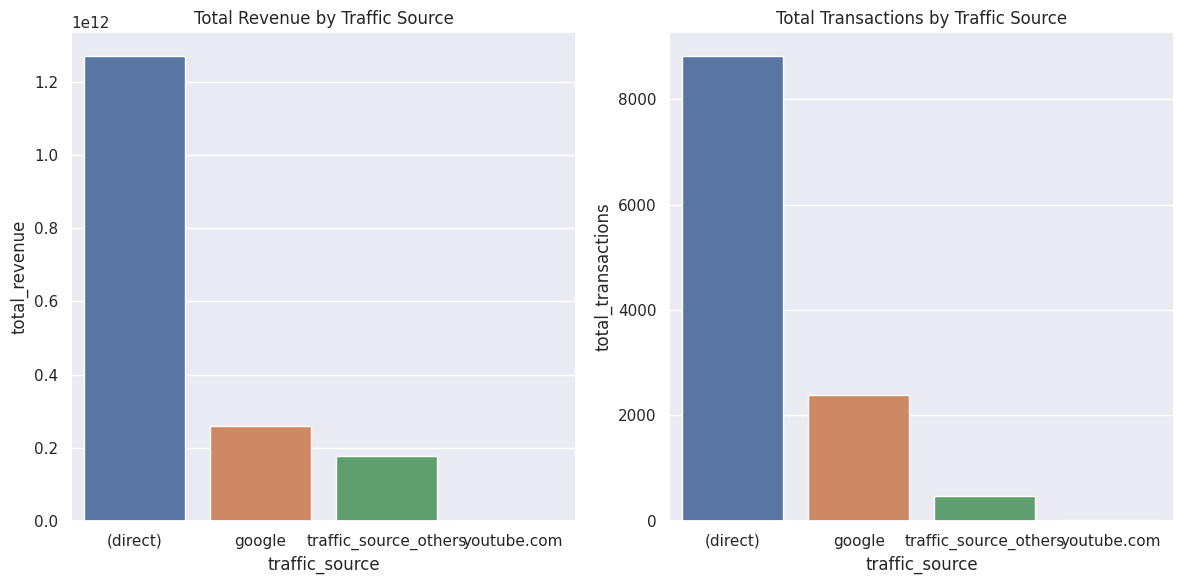

In [30]:
#Traffic Sources or Campaigns Driving Transactions and Revenue

def plot_revenue_by_traffic(df):
    revenue_df = df.groupby('traffic_source').agg(
        total_revenue=('total_transaction_revenue', 'sum'),
        total_transactions=('total_transactions', 'sum')
    ).reset_index()
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    sns.barplot(data=revenue_df, x='traffic_source', y='total_revenue', ax=axes[0])
    axes[0].set_title('Total Revenue by Traffic Source')
    
    sns.barplot(data=revenue_df, x='traffic_source', y='total_transactions', ax=axes[1])
    axes[1].set_title('Total Transactions by Traffic Source')
    
    plt.tight_layout()
    plt.show()

plot_revenue_by_traffic(df_final)


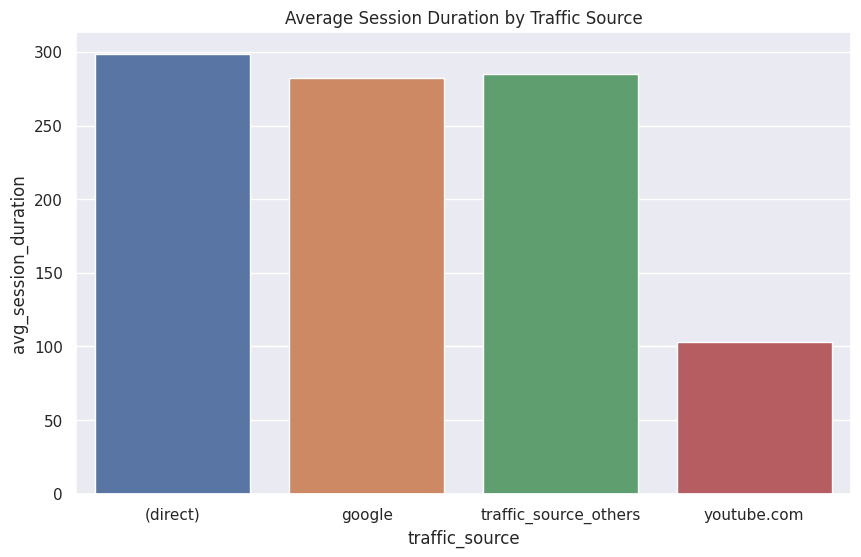

In [31]:
#traffic source vs total time on site

def plot_session_duration_factors(df):
    duration_df = df.groupby('traffic_source').agg(
        avg_session_duration=('total_time_on_site', 'mean')
    ).reset_index()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=duration_df, x='traffic_source', y='avg_session_duration')
    plt.title('Average Session Duration by Traffic Source')
    plt.show()

plot_session_duration_factors(df_final)


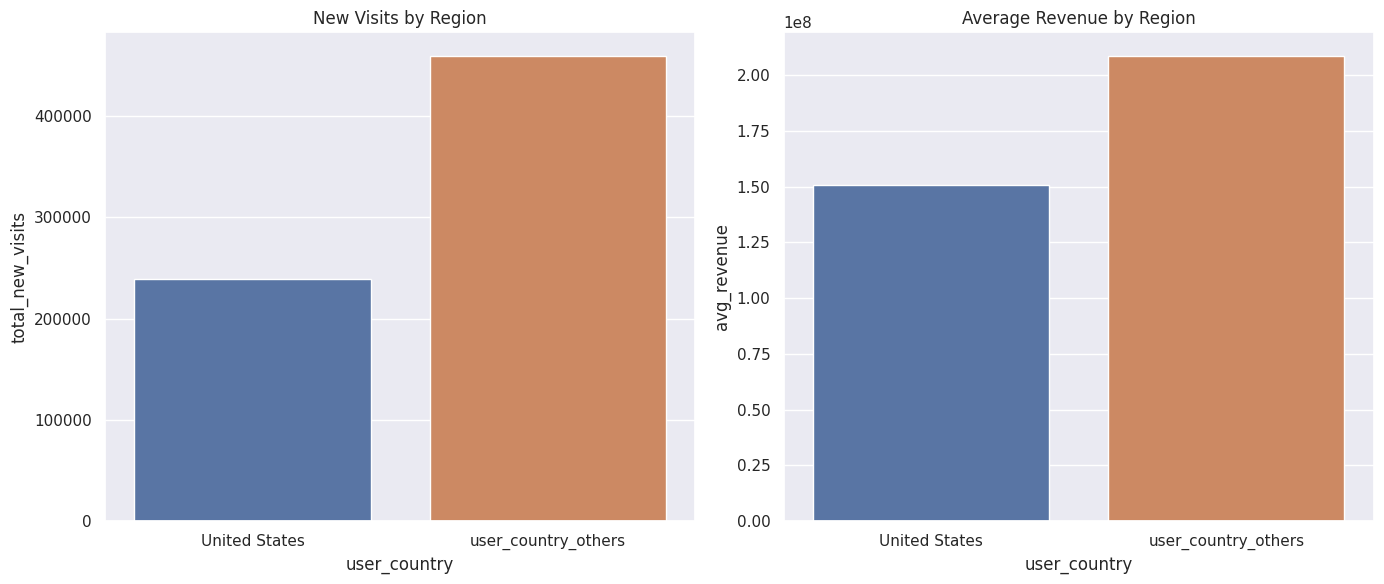

In [32]:
#Regional Effectiveness at Acquiring New Users and Driving Revenue

def plot_regional_effectiveness(df):
    region_df = df.groupby('user_country').agg(
        total_new_visits=('total_new_visits', 'sum'),
        avg_revenue=('total_transaction_revenue', 'mean')
    ).reset_index()
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    sns.barplot(data=region_df, x='user_country', y='total_new_visits', ax=axes[0])
    axes[0].set_title('New Visits by Region')
    
    sns.barplot(data=region_df, x='user_country', y='avg_revenue', ax=axes[1])
    axes[1].set_title('Average Revenue by Region')
    
    plt.tight_layout()
    plt.show()

plot_regional_effectiveness(df_final)
